In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train=pd.read_csv(r"C:\Users\Tiger\Downloads\archive (6)\fraudTrain.csv")
test=pd.read_csv(r"C:\Users\Tiger\Downloads\archive (6)\fraudTest.csv")

In [4]:
df=pd.concat([train, test])
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df.groupby(by="is_fraud").describe()

Unnamed: 0                                                            \
              count           mean            std     min       25%       50%   
is_fraud                                                                        
0         1842743.0  537179.530738  366769.035099     0.0  231756.5  463137.0   
1            9651.0  539849.247228  393083.353516  1685.0  189656.5  453937.0   

                                  cc_num                ...  merch_lat  \
               75%        max      count          mean  ...        75%   
is_fraud                                                ...              
0         833291.5  1296674.0  1842743.0  4.174926e+17  ...  41.955883   
1         900544.5  1295733.0     9651.0  3.970393e+17  ...  42.043486   

                    merch_long                                               \
                max      count       mean        std         min        25%   
is_fraud                                                                      
0         66.682905  1842743.0 -90.228935  13.756973 -166.671575 -96.900634   
1         67.510267     9651.0 -90.037919  14.268910 -166.550779 -96.678370   

                                           
                50%        75%        max  
is_fraud                                   
0        -87.441945 -80.246961 -66.950902  
1        -87.167538 -79.907350 -66.960745  

[2 rows x 80 columns]

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

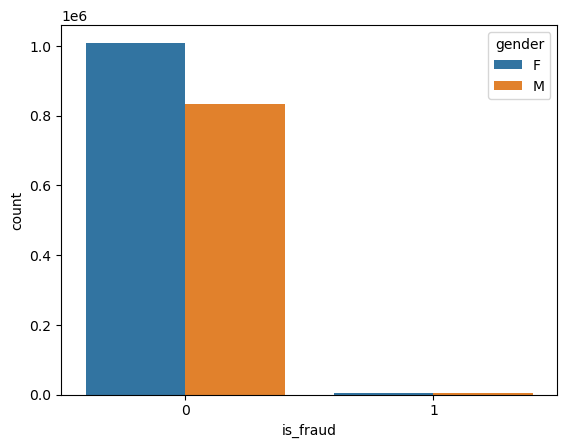

In [6]:
sns.countplot(data=df,x="is_fraud",hue="gender")

data is skewed 

In [22]:
pip install imblearn

     -------------------------------------- 235.6/235.6 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
from imblearn.under_sampling import RandomUnderSampler
x=df.drop("is_fraud",axis=1)
y=df["is_fraud"]
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', y.shape,x.shape)
print('Resample dataset shape', y_rus.shape,x_rus.shape)

original dataset shape: (1852394,) (1852394, 22)
Resample dataset shape (19302,) (19302, 22)


reshaped the data because it was imbalanced

In [8]:
df = pd.concat([x_rus, y_rus], axis=1)



<AxesSubplot:xlabel='is_fraud', ylabel='count'>

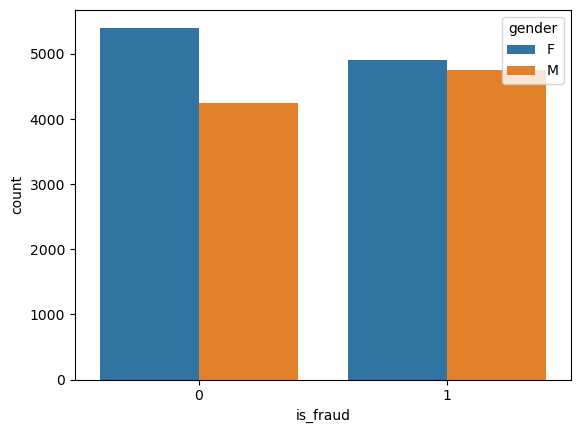

In [9]:
sns.countplot(data=df,x=y_rus,hue=x_rus["gender"])

In [10]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
from datetime import datetime
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

# Calculate the current date
current_date = datetime.now()

# Calculate the age by subtracting the 'dob' from the current date
df['age'] = (current_date - df['dob']).astype('<m8[Y]')

derived a feature - age from dob

In [12]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
123118,123118,2019-03-10 03:24:30,30011465039817,fraud_Huels-Nolan,gas_transport,67.66,Lisa,Garcia,F,213 Gill Expressway,...,-73.5873,4015,Human resources officer,1971-10-14,6744f95a0c456529c4a35cb30a5cb396,1331349870,42.974691,-73.944930,0,52.0
675160,675160,2019-10-14 15:40:47,2288813824604479,fraud_Yost-Rogahn,personal_care,47.79,Barbara,Norman,F,6278 Stephanie Unions,...,-73.9383,1577385,Herbalist,1981-08-29,7c53e2c5bb6aa689753574d9f8ae623f,1350229247,41.046486,-74.132901,0,42.0
133167,133167,2019-03-14 15:21:51,2266735643685262,fraud_Roob-Okuneva,health_fitness,24.17,Carlos,Chung,M,8957 Russell Key,...,-86.2590,5901,Curator,1972-07-25,0b3a94c9a2f622d2f3c3399a6cc3910b,1331738511,34.956184,-86.986784,0,51.0
125748,125748,2020-08-04 00:05:40,3542162746848552,fraud_Stamm-Witting,shopping_net,2.30,Bradley,Anderson,M,3896 Gilmore Mill,...,-93.4824,744,Communications engineer,1968-01-28,f365432529de779881bd7a3292fcc38a,1375574740,43.455569,-93.662698,0,55.0
261154,261154,2019-05-10 09:04:20,4384910379661778,fraud_Howe Ltd,misc_pos,51.69,Michelle,Russell,F,55505 Christy Via,...,-96.4092,4508,Naval architect,1949-04-24,35caf2d1468a377e45235274b005aa02,1336640660,46.851874,-97.269843,0,74.0


In [13]:
df=df.drop(columns=["first","last","street","city","state","zip","cc_num"])

In [14]:
df=df.drop(columns=["dob"])

In [15]:
df=df.drop(columns=['unix_time'])

In [16]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age
123118,123118,2019-03-10 03:24:30,fraud_Huels-Nolan,gas_transport,67.66,F,42.3496,-73.5873,4015,Human resources officer,6744f95a0c456529c4a35cb30a5cb396,42.974691,-73.944930,0,52.0
675160,675160,2019-10-14 15:40:47,fraud_Yost-Rogahn,personal_care,47.79,F,40.8265,-73.9383,1577385,Herbalist,7c53e2c5bb6aa689753574d9f8ae623f,41.046486,-74.132901,0,42.0
133167,133167,2019-03-14 15:21:51,fraud_Roob-Okuneva,health_fitness,24.17,M,34.4959,-86.2590,5901,Curator,0b3a94c9a2f622d2f3c3399a6cc3910b,34.956184,-86.986784,0,51.0
125748,125748,2020-08-04 00:05:40,fraud_Stamm-Witting,shopping_net,2.30,M,43.5089,-93.4824,744,Communications engineer,f365432529de779881bd7a3292fcc38a,43.455569,-93.662698,0,55.0
261154,261154,2019-05-10 09:04:20,fraud_Howe Ltd,misc_pos,51.69,F,46.9777,-96.4092,4508,Naval architect,35caf2d1468a377e45235274b005aa02,46.851874,-97.269843,0,74.0


In [17]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

df['transaction_time_minutes'] = df['trans_date_trans_time'].dt.hour * 60 + df['trans_date_trans_time'].dt.minute+ df['trans_date_trans_time'].dt.second / 60




In [18]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age,transaction_time_minutes
123118,123118,2019-03-10 03:24:30,fraud_Huels-Nolan,gas_transport,67.66,F,42.3496,-73.5873,4015,Human resources officer,6744f95a0c456529c4a35cb30a5cb396,42.974691,-73.944930,0,52.0,204.500000
675160,675160,2019-10-14 15:40:47,fraud_Yost-Rogahn,personal_care,47.79,F,40.8265,-73.9383,1577385,Herbalist,7c53e2c5bb6aa689753574d9f8ae623f,41.046486,-74.132901,0,42.0,940.783333
133167,133167,2019-03-14 15:21:51,fraud_Roob-Okuneva,health_fitness,24.17,M,34.4959,-86.2590,5901,Curator,0b3a94c9a2f622d2f3c3399a6cc3910b,34.956184,-86.986784,0,51.0,921.850000
125748,125748,2020-08-04 00:05:40,fraud_Stamm-Witting,shopping_net,2.30,M,43.5089,-93.4824,744,Communications engineer,f365432529de779881bd7a3292fcc38a,43.455569,-93.662698,0,55.0,5.666667
261154,261154,2019-05-10 09:04:20,fraud_Howe Ltd,misc_pos,51.69,F,46.9777,-96.4092,4508,Naval architect,35caf2d1468a377e45235274b005aa02,46.851874,-97.269843,0,74.0,544.333333


<AxesSubplot:xlabel='gender', ylabel='count'>

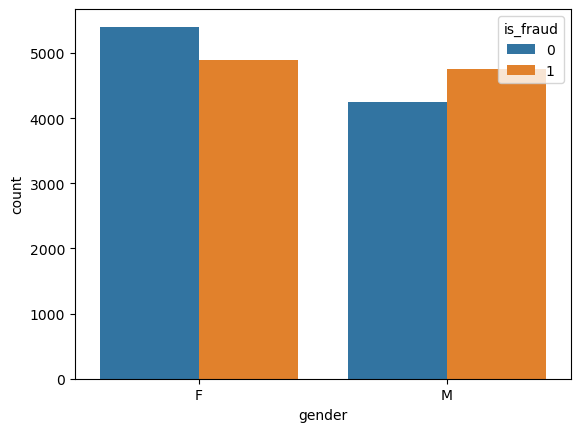

In [19]:
sns.countplot(data=df,x="gender",hue="is_fraud")

Accounts helb by males are more likely to be scammed.

In [20]:
df['age'].describe()

count    19302.000000
mean        50.950627
std         18.083741
min         18.000000
25%         36.000000
50%         49.000000
75%         63.000000
max         98.000000
Name: age, dtype: float64

In [21]:
bins= [18,25,45,60,98]
labels = ['under 25','under 45','under 60','more than 60']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head(5)

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age,transaction_time_minutes,AgeGroup
123118,123118,2019-03-10 03:24:30,fraud_Huels-Nolan,gas_transport,67.66,F,42.3496,-73.5873,4015,Human resources officer,6744f95a0c456529c4a35cb30a5cb396,42.974691,-73.944930,0,52.0,204.500000,under 60
675160,675160,2019-10-14 15:40:47,fraud_Yost-Rogahn,personal_care,47.79,F,40.8265,-73.9383,1577385,Herbalist,7c53e2c5bb6aa689753574d9f8ae623f,41.046486,-74.132901,0,42.0,940.783333,under 45
133167,133167,2019-03-14 15:21:51,fraud_Roob-Okuneva,health_fitness,24.17,M,34.4959,-86.2590,5901,Curator,0b3a94c9a2f622d2f3c3399a6cc3910b,34.956184,-86.986784,0,51.0,921.850000,under 60
125748,125748,2020-08-04 00:05:40,fraud_Stamm-Witting,shopping_net,2.30,M,43.5089,-93.4824,744,Communications engineer,f365432529de779881bd7a3292fcc38a,43.455569,-93.662698,0,55.0,5.666667,under 60
261154,261154,2019-05-10 09:04:20,fraud_Howe Ltd,misc_pos,51.69,F,46.9777,-96.4092,4508,Naval architect,35caf2d1468a377e45235274b005aa02,46.851874,-97.269843,0,74.0,544.333333,more than 60


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

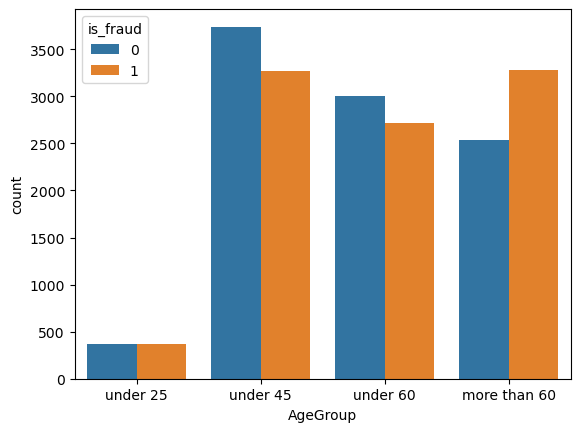

In [22]:
sns.countplot(data=df,x='AgeGroup',hue="is_fraud")

people who are more than 60 are likely to be scammed.

In [23]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'amt',
       'gender', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud', 'age', 'transaction_time_minutes',
       'AgeGroup'],
      dtype='object')

In [43]:
X=df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'AgeGroup','is_fraud','merchant', 'category','trans_num','job','gender'])

In [44]:
y=df['is_fraud']

In [45]:
X.columns

Index(['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age',
       'transaction_time_minutes'],
      dtype='object')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [48]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [51]:
y_pred=classifier.predict(X_test)

In [53]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm

array([[2752,  149],
       [ 237, 2653]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2901
           1       0.95      0.92      0.93      2890

    accuracy                           0.93      5791
   macro avg       0.93      0.93      0.93      5791
weighted avg       0.93      0.93      0.93      5791



Accuracy of Random Forest is 93%

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
lr_pred=lr.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,lr_pred))

MSE 0.15179033853107113


In [64]:
import numpy as np
np.sqrt(mean_squared_error(y_test,lr_pred))

0.38960279584606566

In [65]:
from sklearn.tree import DecisionTreeClassifier 

In [66]:
dt=DecisionTreeClassifier()

In [67]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
dt_pred=dt.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix  
dt_cm= confusion_matrix(y_test, dt_pred)
dt_cm

array([[2707,  194],
       [ 221, 2669]], dtype=int64)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2901
           1       0.93      0.92      0.93      2890

    accuracy                           0.93      5791
   macro avg       0.93      0.93      0.93      5791
weighted avg       0.93      0.93      0.93      5791



decision tree gives accuracy of 93%